In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures  # Importamos PolynomialFeatures de scikit-learn para crear características polinómicas
from sklearn.linear_model import LinearRegression  # Importamos LinearRegression de scikit-learn para regresión lineal
from sklearn.metrics import mean_squared_error  # Importamos mean_squared_error de scikit-learn para evaluar el rendimiento del modelo
from sklearn.linear_model import Ridge  # Importamos Ridge de scikit-learn para regresión Ridge
from sklearn.model_selection import ShuffleSplit  # Importamos ShuffleSplit de scikit-learn para dividir los datos
from scipy.stats import norm  # Importamos norm de SciPy para distribución normal

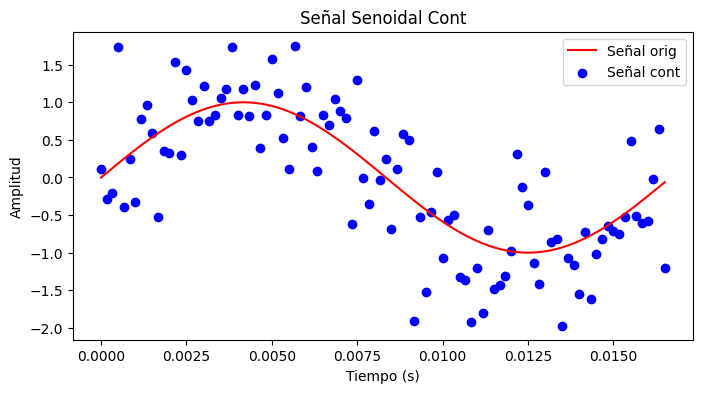

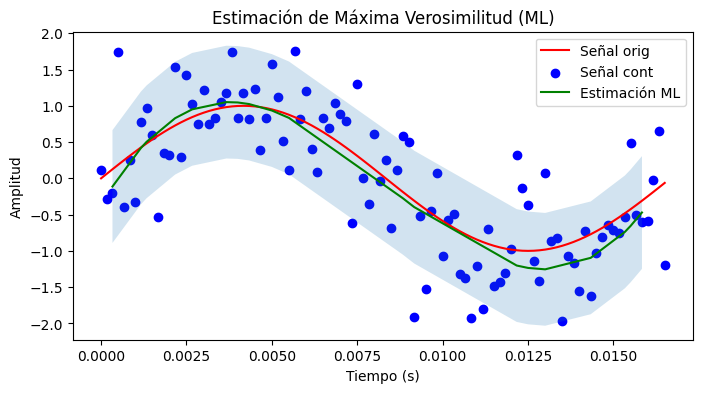

Error Cuadrático Medio (MSE) en la estimación ML: 0.6045675009533861


In [2]:
# Definimos los parámetros de la señal
Fo = 60  # Frecuencia fundamental de la señal en Hz
A = 1   # Amplitud de la señal
To = 1 / Fo  # Período fundamental en seg (s)
Fs = 100 * Fo  # Frecuencia de muestreo (Fs >= 2Fo según Nyquist)
X_n = np.arange(0, To, 1 / Fs)  # Vector de entrada en un período con pasos según el período de muestreo

snrdB = 2  # Relación señal a ruido en dB (SNR)

# Señal limpia
tt = A * np.sin(2 * np.pi * Fo * X_n)

#calcular Var SNR



Px = np.mean(tt**2) #estimador potencia media de la señal


# Modelo con la función senoidal contaminada con ruido Gaussiano
t = A * np.sin(2 * np.pi * Fo * X_n) + np.sqrt(Px/ (10**(snrdB / 10))) * np.random.randn(len(X_n))

# Preparamos los datos para la simulación
X = X_n.reshape(-1, 1)
t = t.reshape(-1, 1)

# Visualizamos la señal contaminada
plt.figure(figsize=(8, 4))
plt.plot(X, tt, c='r', label='Señal orig')
plt.scatter(X, t, c='b', label='Señal cont')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Senoidal Cont')
plt.show()

# Preparamos el mapeo polinomial de orden Q = 9
Q = 9
poly = PolynomialFeatures(degree=Q)
Phi = poly.fit_transform(X)

# Particionamos los datos: 100 para entrenar, 20 para predecir
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2)
for train_i, test_i in rs.split(X):
    train_i = np.sort(train_i)
    test_i = np.sort(test_i)

# Creamos el Regresor de Máxima Verosimilitud (ML) usando Ridge Regression

lambdaR = 1e-15  # Hiperparámetro de regularización
reg_mc = Ridge(alpha=lambdaR)
reg_mc.fit(Phi[train_i], t[train_i])
t_mc = reg_mc.predict(Phi[test_i])

# Calculamos el error cuadrático medio (MSE) en la estimación ML
var_ml = (np.linalg.norm(t[test_i] - t_mc)**2) / len(t[test_i])

# Visualizamos los resultados
plt.figure(figsize=(8, 4))
plt.plot(X, tt, c='r', label='Señal orig')
plt.scatter(X, t, c='b', label='Señal cont')
plt.plot(X[test_i], t_mc, c='g', label='ML estimate')
plt.fill_between(X[test_i].ravel(), t_mc.ravel() - np.sqrt(var_ml)*np.ones(len(t_mc)),
                t_mc.ravel() + np.sqrt(var_ml)*np.ones(len(t_mc)), alpha=0.2)

plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Estimación de Máxima Verosimilitud (ML)')
plt.show()

print(f'Error Cuadrático Medio (MSE) en la estimación ML: {var_ml}')

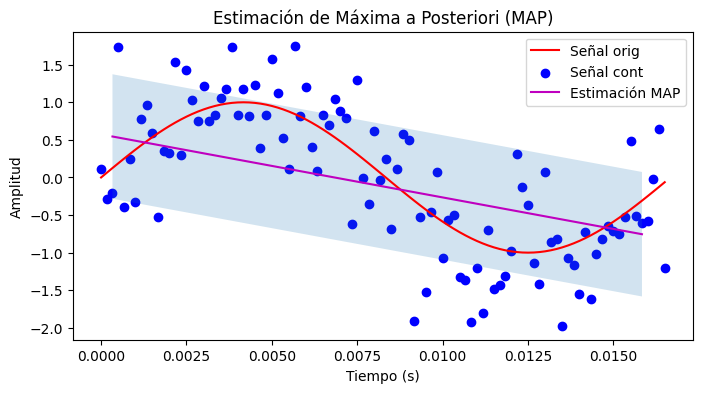

Error Cuadrático Medio (MSE) en la estimación MAP: 0.6854994085810774


In [3]:
# Regresor de Máxima a Posteriori (MAP) usando Ridge Regression
lambdaR_map = 1e-3  # Hiperparámetro de regularización para MAP (ajusta según sea necesario)
reg_map = Ridge(alpha=lambdaR_map)
reg_map.fit(Phi[train_i], t[train_i])
t_map = reg_map.predict(Phi[test_i])

# Calculamos el error cuadrático medio (MSE) en la estimación MAP
var_map = (np.linalg.norm(t[test_i] - t_map)**2) / len(t[test_i])

# Visualizamos el resultado de MAP
plt.figure(figsize=(8, 4))
plt.plot(X, tt, c='r', label='Señal orig')
plt.scatter(X, t, c='b', label='Señal cont')
plt.plot(X[test_i], t_map, c='m', label='MAP estimate')
plt.fill_between(X[test_i].ravel(), t_map.ravel() - np.sqrt(var_map)*np.ones(len(t_map)),
                t_map.ravel() + np.sqrt(var_map)*np.ones(len(t_map)), alpha=0.2)

plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Estimación de Máxima a Posteriori (MAP)')
plt.show()

print(f'Error Cuadrático Medio (MSE) en la estimación MAP: {var_map}')

#Bibliografia: https://github.com/amalvarezme/AprendizajeMaquina/blob/main/Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb
